In [1]:
import sys

my_path = r"C:\Users\alomb\OneDrive\new_racine\Documents\_Pro\CODE\Data_analysis"
if my_path not in sys.path : sys.path.append(my_path); print("path added")

from f_analyse import * 

path added


In [ ]:
fs = 50
X = np.linspace(0,10,5*fs)
Y = np.cos(2*np.pi*X) + 0.2*np.cos(1.56*2*np.pi*X) + 1*np.random.random(size=len(X))

sig0 = T_signal(data = Y,
                fs = fs,
                unit = 'Volts',
                name = 'sig0',
                t0 = 2)

sig0.plot()

In [ ]:
sig0.plot()
sig0.plot_ADD_box_on_recut(3,3.5)

In [ ]:
sig0.recut(3,3.5).plot()

In [ ]:
sig0_fft = sig0.fft()
sig0_fft.plot(figsize=(10,10))

In [ ]:
sig0_fft.Modul.plot()

# Zero Pading

In [ ]:
for n_factor in [1,1.5,2,3,5,10] :
    Sfft = sig0.fft(choose_next_power_of_2=False,n_factor=n_factor)
    n_used = Sfft.N
    Sfft.Modul.recut(0,5).plot()
    plt.title(f"n_factor = {n_factor} (n={n_used})")
Sfft = sig0.fft(choose_next_power_of_2=True)
n_used = Sfft.N
Sfft.Modul.recut(0,5).plot()
plt.title(f"next power of 2 (={n_used})");

# Sum

(0.0, 2.0998819185904205)

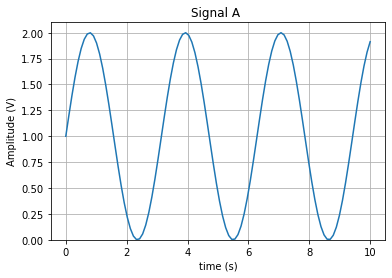

In [2]:
X = np.linspace(0,10,100)
Y = np.sin(2*X)+1
sigA = T_signal(data=Y,fs=10,unit='V',name='Signal A')
sigA.plot()
plt.ylim(0)


verifier le type


(0.0, 12.099881918590421)

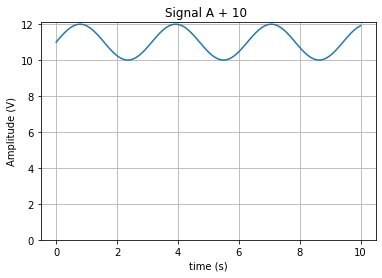

In [3]:
sigB = sigA + 10
sigB.plot()
plt.ylim(0)

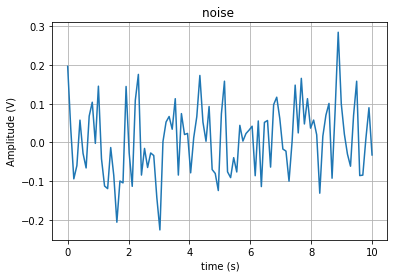

In [4]:
Y_noise = np.random.normal(0,0.1,len(X))
sig_noise = T_signal(data=Y_noise,fs=10,unit='V',name='noise')
sig_noise.plot()

verifier le type
type debug <class 'f_analyse.C_signal'>
type debug <class 'f_analyse.C_signal'>
verifier le type
type debug <class 'f_analyse.C_signal'>
type debug <class 'f_analyse.C_signal'>


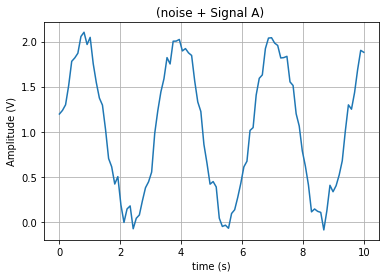

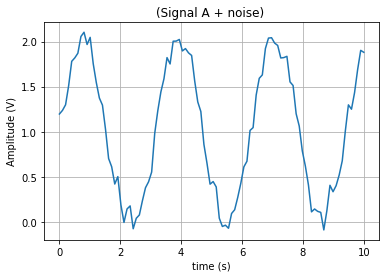

In [5]:
(sig_noise + sigA).plot()
(sigA + sig_noise).plot()

In [8]:
sig_noise.recut(0,5)

debug43242 0 None


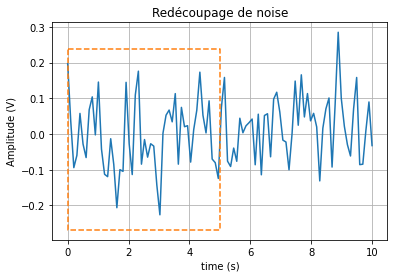

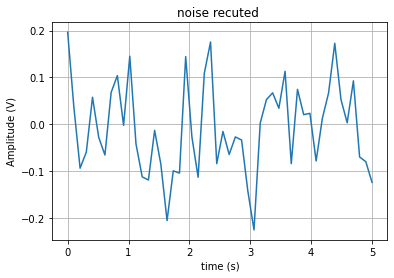

In [6]:
sig_noise.plot()
sig_noise.plot_ADD_box(0,5)
plt.title("Redécoupage de noise")

small_noise = sig_noise.recut(0,5)
small_noise.plot()

In [12]:
class test:
    arr = np.array([1,2,3])

T = test()
np.pad(T.arr,(0,5))

array([1, 2, 3, 0, 0, 0, 0, 0])

# Somme de signaux de tailles différentes

verifier le type
type debug <class 'f_analyse.C_signal'>
type debug <class 'f_analyse.C_signal'>
fill due to different duration
verifier le type
type debug <class 'f_analyse.C_signal'>
type debug <class 'f_analyse.C_signal'>
fill due to different duration


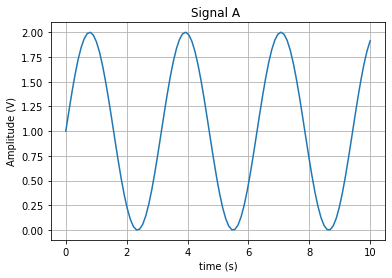

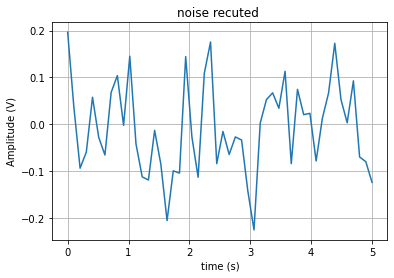

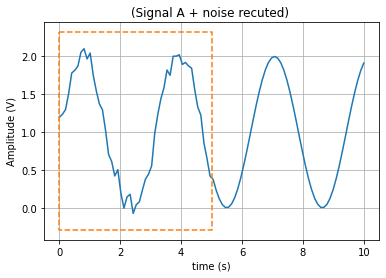

In [8]:
sigA.plot()
small_noise.plot()
(sigA + small_noise).plot()
(sigA + small_noise).plot_ADD_box(0,5)

# Somme de signaux ayant des t0 différents

In [ ]:
sig_noise2 = sig_noise.copy()
sig_noise2.t0 = 5

# Multiplication

In [ ]:
sig

In [ ]:
sig1.plot()

In [ ]:
sig0_fft.plot()
sig1.plot()